C:\Users\91930\AppData\Local\Temp\ipykernel_30140\2534716058.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['travel_date'] = pd.to_datetime(df['travel_date'], errors='coerce', dayfirst=True)
C:\Users\91930\AppData\Local\Temp\ipykernel_30140\2534716058.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['travel_time'] = pd.to_datetime(df['travel_time'], errors='coerce').dt.time


Linear Regression:
MAE: 2.445201073913426
R^2 Score: 0.5474067960116773

Random Forest:
MAE: 2.462454047403211
R^2 Score: 0.5294023458079983


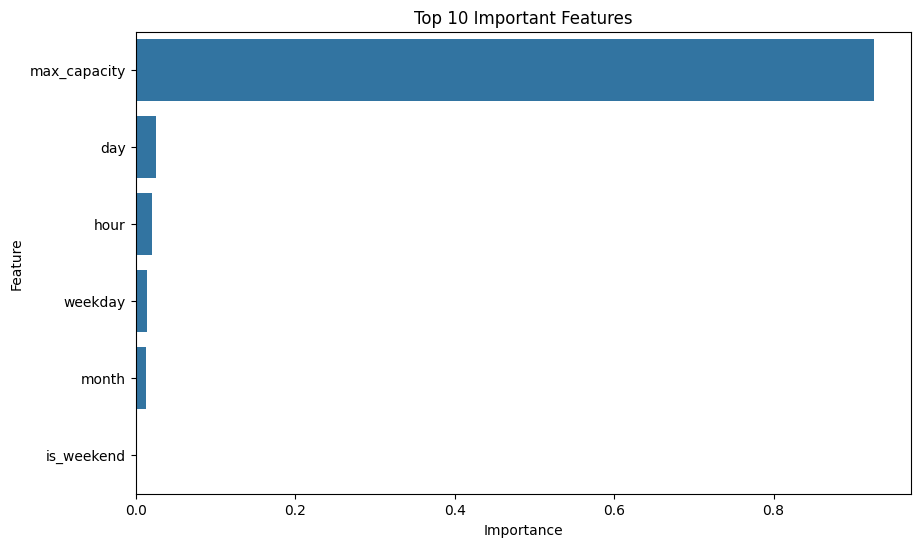

In [3]:
# -----------------------
# 1. Import Libraries
# -----------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------
# 2. Load Dataset
# -----------------------
df = pd.read_csv("train_revised.csv")

# -----------------------
# 3. Parse Dates Safely
# -----------------------
df['travel_date'] = pd.to_datetime(df['travel_date'], errors='coerce', dayfirst=True)
df['travel_time'] = pd.to_datetime(df['travel_time'], errors='coerce').dt.time

# Drop rows with invalid datetime parsing
df.dropna(subset=['travel_date', 'travel_time'], inplace=True)

# -----------------------
# 4. Clean String Columns
# -----------------------
# Example: Clean seat_number if needed
df = df[df['seat_number'].apply(lambda x: str(x).isdigit())]
df['seat_number'] = df['seat_number'].astype(int)

# -----------------------
# 5. Feature Engineering
# -----------------------
df['day'] = df['travel_date'].dt.day
df['month'] = df['travel_date'].dt.month
df['weekday'] = df['travel_date'].dt.weekday
df['hour'] = pd.to_datetime(df['travel_time'], format='%H:%M:%S', errors='coerce').dt.hour
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Drop original datetime columns
df = df.drop(columns=['travel_date', 'travel_time'])

# One-hot encode categoricals
df = pd.get_dummies(df, columns=['travel_from', 'car_type', 'payment_method'], drop_first=True)

# -----------------------
# 6. Prepare Data for Modeling
# -----------------------
X = df.drop(['seat_number', 'ride_id', 'payment_receipt'], axis=1)
y = df['seat_number']

# Ensure X is numeric only
X = X.select_dtypes(include=[np.number])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------
# 7. Train & Evaluate Linear Regression
# -----------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R^2 Score:", r2_score(y_test, y_pred_lr))

# -----------------------
# 8. Train & Evaluate Random Forest
# -----------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))

print("R^2 Score:", r2_score(y_test, y_pred_rf))

# -----------------------
# 9. Feature Importance Plot
# -----------------------
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features")
plt.show()
